<a href="https://colab.research.google.com/github/GuinhoHenriq/Projeto_T22/blob/main/Opendata_AIG_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opendata AIG Brazil

---


A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA).

Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro.

In [ ]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot


In [ ]:
#Importação do Dataset
dadosCenipa = pd.read_csv("ocorrencias_cenipa.csv",sep =';',encoding='ISO-8859-1', index_col=0)

In [ ]:
dadosCenipa.head()

,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
codigo,,,,,,,,,,,,,,,,,,,,
40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE



*   Colunas do Dataset.

In [ ]:
dadosCenipa.columns.values

array(['tipo', 'descricao', 'cidade', 'estado', 'data', 'ano', 'hora',
       'aeronave_liberada', 'status_investigacao', 'aeronaves_envolvidas',
       'ocorrencia_saida_pista', 'aeronave_tipo', 'aeronave_fabricante',
       'motor_tipo', 'aeronave_motor_quantidade', 'aeronave_assentos',
       'aeronave_ano_fabricacao', 'aeronave_pais_fabricante',
       'aeronave_fase_operacao', 'aeronave_nivel_dano'], dtype=object)


* Colunas que serão utilizadas.

In [ ]:
#Escolhendo varíaveis para analisármos. 
colunasSelecionadas = [
                       'codigo','tipo','cidade','estado','data',
                       'status_investigacao','aeronave_tipo',
                       'aeronave_fabricante','aeronave_assentos','aeronave_ano_fabricacao',
                       'aeronave_fase_operacao','aeronave_nivel_dano']
dadosCenipaSelecionados = dadosCenipa.filter(items = colunasSelecionadas)
dadosCenipaSelecionados

,tipo,cidade,estado,data,status_investigacao,aeronave_tipo,aeronave_fabricante,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fase_operacao,aeronave_nivel_dano
codigo,,,,,,,,,,,
40107,ACIDENTE,GURUPÁ,PA,12/01/2010,FINALIZADA,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,7,1977,POUSO,LEVE
40147,ACIDENTE,UNIÃO DA VITÓRIA,PR,08/04/2010,FINALIZADA,AVIÃO,PIPER AIRCRAFT,6,1997,POUSO,SUBSTANCIAL
40148,ACIDENTE,CAMPO GRANDE,MS,19/03/2010,FINALIZADA,AVIÃO,CESSNA AIRCRAFT,6,1962,APROXIMAÇÃO FINAL,SUBSTANCIAL
40149,ACIDENTE,LUZIÂNIA,GO,21/03/2010,FINALIZADA,AVIÃO,XAVANTE,2,1974,DECOLAGEM,DESTRUÍDA
40150,INCIDENTE GRAVE,SANTA MARIA,RS,10/03/2010,FINALIZADA,AVIÃO,BEECH AIRCRAFT,6,1974,POUSO,LEVE
...,...,...,...,...,...,...,...,...,...,...,...
79117,ACIDENTE,ASSIS BRASIL,AC,23/10/2019,FINALIZADA,INDETERMINADO,FABRICANTE DESCONHECIDO,0,0,INDETERMINADO,DESTRUÍDA
79119,ACIDENTE,SÃO JOSÉ DO RIO CLARO,MT,11/10/2019,FINALIZADA,INDETERMINADO,FABRICANTE DESCONHECIDO,0,0,INDETERMINADO,DESTRUÍDA
79123,ACIDENTE,ANTONINA,PR,21/09/2019,FINALIZADA,TRIKE,INDETERMINADO,0,0,DECOLAGEM,SUBSTANCIAL


# Número de acidentes, acidentes graves e incidentes por estados

Análise da quantidade de acidentes, acidentes graves e incidentes por UF, onde podemos constatar que o estado de São Paulo tem o maior indíce, seguido por Minas Gerais e Rio de Janeiro:

In [ ]:
coluna_acidente_estado = dadosCenipaSelecionados['estado']
coluna_acidente_estado.value_counts().sort_index()

#acidentesEstado = dadosCenipaSelecionados [(dadosCenipaSelecionados['tipo'] == 'ACIDENTE')]

#acidentesEstado.groupby(by='estado').size()


AC      54
AL      30
AM     217
AP       9
BA     200
CE      78
DF     129
ES      70
GO     286
MA      68
MG     482
MS     132
MT     255
PA     263
PB      23
PE      90
PI      36
PR     441
RJ     480
RN      14
RO      30
RR      49
RS     334
SC     166
SE      21
SP    1239
TO      46
Name: estado, dtype: int64

# Número de acidentes, acidentes graves e incidentes por cidades

Análise da quantidade de acidentes, acidentes graves e incidentes por cidades:






In [ ]:
coluna_acidente_cidade = dadosCenipaSelecionados['cidade']
coluna_acidente_cidade.value_counts().sort_index()

ABADIA DE GOIÁS    2
ACREÚNA            1
AFONSO CLÁUDIO     1
AFUÁ               2
AGUAÍ              1
                  ..
ÁGUA CLARA         4
ÁGUA LIMPA         1
ÁLVARES MACHADO    2
ÂNGULO             1
ÓBIDOS             2
Name: cidade, Length: 1042, dtype: int64

# Número de acidentes, acidentes graves e incidentes por fabricantes

Análise da quantidade de acidentes, acidentes graves e incidentes por fabricantes de aeronaves, onde podemos constatar que a fabricante AERO BOERO lidera o ranking com 179 acidentes totais:

In [ ]:
coluna_acidente_fabricante = dadosCenipaSelecionados['aeronave_fabricante']
coluna_acidente_fabricante.value_counts().sort_index()

AERO BOERO                                179
AERO COMMANDER                              1
AEROALCOOL TECNOLOGIA LTDA                  3
AEROBRAVO                                   1
AEROBRAVO INDÚSTRIA AERONÁUTICA LTDA        1
                                         ... 
VECTOR ULTRALIGHT INDUSTRIA E COMERCIO      2
VERA LUCIA NICIOLI                          1
VINICIUS MARINI FERREIRA                    1
WILLIAM DA SILVA MATIAS                     1
XAVANTE                                    10
Name: aeronave_fabricante, Length: 223, dtype: int64

-----------Guilherme--------------

In [ ]:
colunasSelecionadas = [
                       'tipo','descricao','hora','aeronave_tipo',
                       ]
dadosCenipaSelecionados = dadosCenipa.filter(items = colunasSelecionadas)
dadosCenipaSelecionados

,tipo,descricao,hora,aeronave_tipo
codigo,,,,
40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,14:30:00,AVIÃO
40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,14:20:00,AVIÃO
40148,ACIDENTE,PANE SECA,19:30:00,AVIÃO
40149,ACIDENTE,FALHA DO MOTOR EM VOO,20:45:00,AVIÃO
40150,INCIDENTE GRAVE,COM TREM DE POUSO,17:20:00,AVIÃO
...,...,...,...,...
79117,ACIDENTE,INDETERMINADO,15:00:00,INDETERMINADO
79119,ACIDENTE,INDETERMINADO,10:00:00,INDETERMINADO
79123,ACIDENTE,INDETERMINADO,18:30:00,TRIKE


---------LEANDRO----------

# Regressão Linear

Analise da relação entre o número de assentos e ano de fabricação das aeronaves envolvidas nos acidentes.

In [ ]:
dadosCenipaSelecionados.aeronave_assentos.corr(dadosCenipaSelecionados.aeronave_ano_fabricacao)

0.0234078955073887

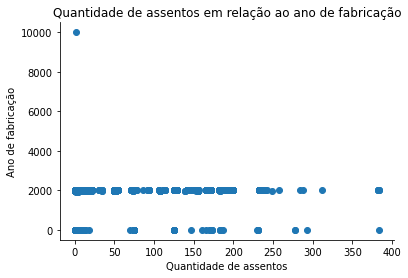

In [ ]:
plt.scatter(dadosCenipaSelecionados.aeronave_assentos,dadosCenipaSelecionados.aeronave_ano_fabricacao)

plt.title('Quantidade de assentos em relação ao ano de fabricação')
plt.xlabel('Quantidade de assentos')
plt.ylabel('Ano de fabricação')

sns.despine()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array(dadosCenipaSelecionados['aeronave_ano_fabricacao'])
x = x.reshape(-1, 1)

y = np.array(dadosCenipaSelecionados['aeronave_assentos'])

# criação do modelo linear
lm_model = LinearRegression(normalize=True)
lm_model.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





LinearRegression(normalize=True)

In [ ]:
# extrair coeficientes
inclinacao = lm_model.coef_
intersecao = lm_model.intercept_

In [ ]:
print(f'a - interseção: \t{format(intersecao)}')
print(f'b - inclinação: \t{format(inclinacao[0])}')
print(f'Equação: \t\tŶ = {intersecao} + {inclinacao[0]} * X')

a - interseção: 	22.88486293917338
b - inclinação: 	0.0025172744294004734
Equação: 		Ŷ = 22.88486293917338 + 0.0025172744294004734 * X


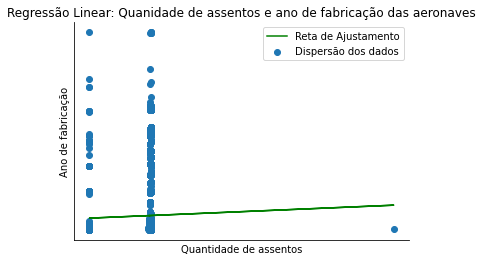

In [ ]:
plt.scatter(x, y)
plt.plot(x, (x * inclinacao + intersecao), color='g')
plt.legend(['Reta de Ajustamento', 'Dispersão dos dados'])
plt.title(
    'Regressão Linear: Quanidade de assentos e ano de fabricação das aeronaves')
plt.xticks([])
plt.yticks([])
plt.xlabel('Quantidade de assentos')
plt.ylabel('Ano de fabricação')
sns.despine()

------------- THAMIRES -------------

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

df = pd.read_csv('/content/ocorrencias_cenipa.csv', index_col=0, sep=';', encoding='ISO-8859-1')

VARIÁVEL "TIPO:"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

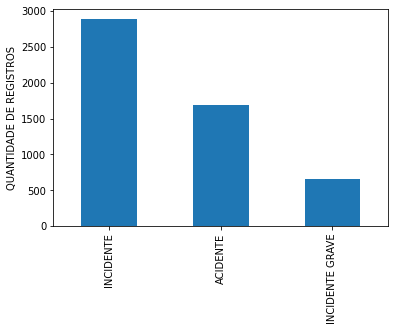

In [ ]:
df.tipo.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.tipo.value_counts().mean()

Média :


1747.3333333333333

In [ ]:
print("Moda:")
df.tipo.value_counts().mode()

Moda :


0     661
1    1694
2    2887
dtype: int64

In [ ]:
print("Mediana:")
df.tipo.value_counts().median()

Mediana:


1694.0

In [ ]:
print("Desvio padrão:")
df.tipo.value_counts().std()

Desvio padrão:


1113.9579585124986

VARIÁVEL "ESTADO":

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

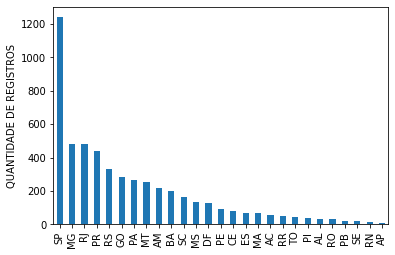

In [ ]:
df.estado.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.estado.value_counts().mean()



Média:
Moda:
Mediana:
Desvio padrão:


254.6748611470808

In [ ]:
print("Moda:")
df.estado.value_counts().mode()


Moda:


0    30
dtype: int64

In [ ]:

print("Mediana:")
df.estado.value_counts().median()


Mediana:


90.0

In [ ]:

print("Desvio padrão:")
df.estado.value_counts().std()

Desvio padrão:


254.6748611470808

VARIÁVEL "ANO"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

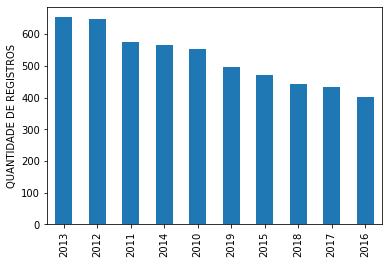

In [ ]:
df.ano.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.ano.value_counts().mean()

Média:


524.2

In [ ]:
print("Moda:")
df.ano.value_counts().mode()

Moda:


0    403
1    434
2    443
3    471
4    496
5    552
6    567
7    576
8    647
9    653
dtype: int64

In [ ]:
print("Mediana:")
df.ano.value_counts().median()

Mediana:


524.0

In [ ]:
print("Desvio padrão:")
df.ano.value_counts().std()

Desvio padrão:


88.19271826832166

VARIÁVEL "AERONAVE LIBERADA"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

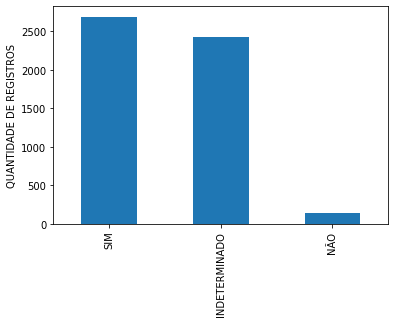

In [ ]:
df.aeronave_liberada.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.aeronave_liberada.value_counts().mean()

Média:


1747.3333333333333

In [ ]:
print("Moda:")
df.aeronave_liberada.value_counts().mode()

Moda:


0     136
1    2419
2    2687
dtype: int64

In [ ]:
print("Mediana:")
df.aeronave_liberada.value_counts().median()

Mediana:


2419.0

In [ ]:
print("Desvio padrão:")
df.aeronave_liberada.value_counts().std()

Desvio padrão:


1401.874578317666

VARIÁVEL "STATUS INVESTIGAÇÃO"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

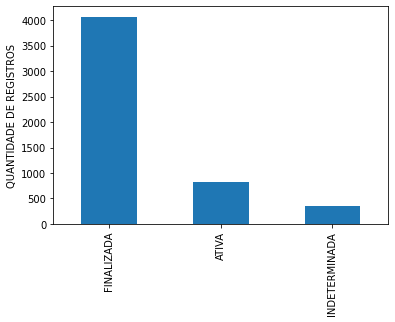

In [ ]:
df.status_investigacao.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.status_investigacao.value_counts().mean()

Média:


1747.3333333333333

In [ ]:
print("Moda:")
df.status_investigacao.value_counts().mode()

Moda:


0     360
1     816
2    4066
dtype: int64

In [ ]:
print("Mediana:")
df.status_investigacao.value_counts().median()

Mediana:


816.0

In [ ]:
print("Desvio padrão:")
df.status_investigacao.value_counts().std()

Desvio padrão:


2020.9268500698718

VARIÁVEL "AERONAVES ENVOLVIDAS"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

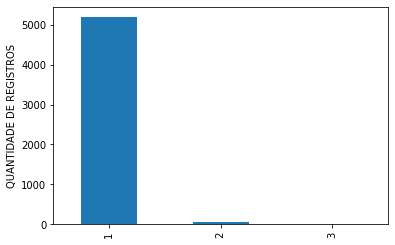

In [ ]:
df.aeronaves_envolvidas.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.aeronaves_envolvidas.value_counts().mean()

Média:


1747.3333333333333

In [ ]:
print("Moda:")
df.aeronaves_envolvidas.value_counts().mode()

Moda:


0       2
1      58
2    5182
dtype: int64

In [ ]:
print("Mediana:")
df.aeronaves_envolvidas.value_counts().median()

Mediana:


58.0

In [ ]:
print("Desvio padrão:")
df.aeronaves_envolvidas.value_counts().std()

Desvio padrão:


2974.640370420151

VARIÁVEL "OCORRENCIA SAÍDA PISTA"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

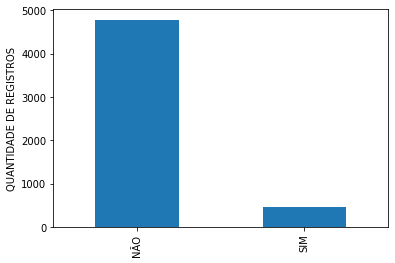

In [ ]:
df.ocorrencia_saida_pista.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.ocorrencia_saida_pista.value_counts().mean()

Média:


2621.0

In [ ]:
print("Moda:")
df.ocorrencia_saida_pista.value_counts().mode()

Moda:


0     458
1    4784
dtype: int64

In [ ]:
print("Mediana:")
df.ocorrencia_saida_pista.value_counts().median()

Mediana:


2621.0

In [ ]:
print("Desvio padrão:")
df.ocorrencia_saida_pista.value_counts().std()

Desvio padrão:


3058.9439354130045

VARIÁVEL "TIPO AERONAVE"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

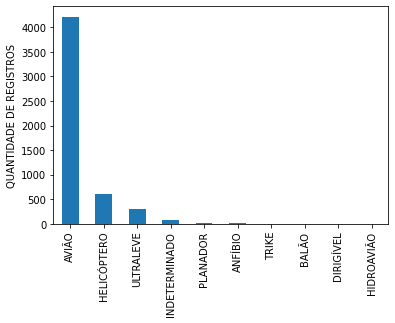

In [ ]:
df.aeronave_tipo.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.aeronave_tipo.value_counts().mean()

Média:


524.2

In [ ]:
print("Moda:")
df.aeronave_tipo.value_counts().mode()

Moda:


0    1
dtype: int64

In [ ]:
print("Mediana:")
df.aeronave_tipo.value_counts().median()

Mediana:


13.5

In [ ]:
print("Desvio padrão:")
df.aeronave_tipo.value_counts().std()

Desvio padrão:


1310.8169462845174

VARIÁVEL "TIPO MOTOR"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

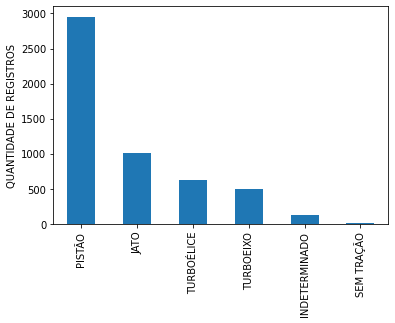

In [ ]:
df.motor_tipo.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.motor_tipo.value_counts().mean()

Média:


873.6666666666666

In [ ]:
print("Moda:")
df.motor_tipo.value_counts().mode()

Moda:


0      15
1     132
2     501
3     625
4    1017
5    2952
dtype: int64

In [ ]:
print("Mediana:")
df.motor_tipo.value_counts().median()

Mediana:


563.0

In [ ]:
print("Desvio padrão:")
df.motor_tipo.value_counts().std()

Desvio padrão:


1079.6395077370346

VARIÁVEL "QUANTIDADE MOTOR AERONAVE"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

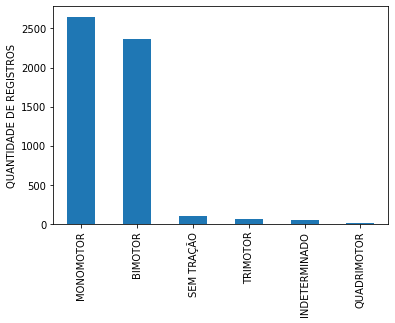

In [ ]:
df.aeronave_motor_quantidade.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.aeronave_motor_quantidade.value_counts().mean()

Média:


873.6666666666666

In [ ]:
print("Moda:")
df.aeronave_motor_quantidade.value_counts().mode()

Moda:


0       6
1      54
2      69
3     100
4    2365
5    2648
dtype: int64

In [ ]:
print("Mediana:")
df.aeronave_motor_quantidade.value_counts().median()

Mediana:


84.5

In [ ]:
print("Desvio padrão:")
df.aeronave_motor_quantidade.value_counts().std()

Desvio padrão:


1268.312369515754

VARIÁVEL "PAÍS FABRICANTE"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

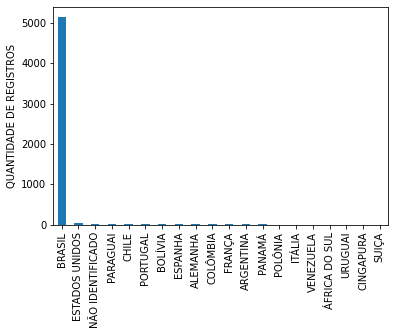

In [ ]:
df.aeronave_pais_fabricante.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.aeronave_pais_fabricante.value_counts().mean()

Média:


262.1

In [ ]:
print("Moda:")
df.aeronave_pais_fabricante.value_counts().mode()

Moda:


0    1
dtype: int64

In [ ]:
print("Mediana:")
df.aeronave_pais_fabricante.value_counts().median()

Mediana:


2.0

In [ ]:
print("Desvio padrão:")
df.aeronave_pais_fabricante.value_counts().std()

Desvio padrão:


1147.9520850077693

VARIÁVEL "NÍVEL DANO"

Text(0, 0.5, 'QUANTIDADE DE REGISTROS')

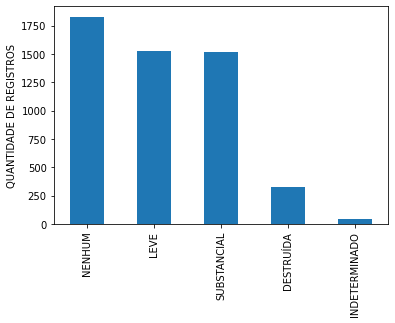

In [ ]:
df.aeronave_nivel_dano.value_counts().plot(kind='bar')
plt.ylabel('QUANTIDADE DE REGISTROS')

In [ ]:
print("Média:")
df.aeronave_nivel_dano.value_counts().mean()

Média:


1048.4

In [ ]:
print("Moda:")
df.aeronave_nivel_dano.value_counts().mode()

Moda:


0      42
1     329
2    1515
3    1529
4    1827
dtype: int64

In [ ]:
print("Mediana:")
df.aeronave_nivel_dano.value_counts().median()

Mediana:


1515.0

In [ ]:
print("Desvio padrão:")
df.aeronave_nivel_dano.value_counts().std()

Desvio padrão:


803.9414157760502

----------------------------------------------------------------------------------------------------------------------------------------------



# > **Comparativo de acidente**



*   Tipo 
*   Descrição
*   Cidade
*   Estado
*   Data
*   Ano   
*   Hora
*   Tipo de Aeronave
*   Tipo de Motor
*   Quantidade de Motor
*   Quantidade de Assentos 
*   Modo Operante
*   Ano de Fabricação
*   Fabricante
*   Nível de Dano 

















In [ ]:
#Correlação de variaveis para tomada de descisão

colunasSelecionadas = [
                       'tipo','descricao','cidade','estado','data','ano','hora',
                       'aeronave_tipo','aeronave_fabricante','motor_tipo',
                       'aeronave_motor_quantidade','aeronave_assentos',
                       'aeronave_ano_fabricacao','aeronave_fase_operacao',
                       'aeronave_nivel_dano']

dadosCenipaSelecionadosAcidentes = dadosCenipa.filter(items = colunasSelecionadas)
dadosCenipaSelecionadosAcidentes

,tipo,descricao,cidade,estado,data,ano,hora,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_fase_operacao,aeronave_nivel_dano
codigo,,,,,,,,,,,,,,,
40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,POUSO,LEVE
40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,POUSO,SUBSTANCIAL
40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,APROXIMAÇÃO FINAL,SUBSTANCIAL
40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,DECOLAGEM,DESTRUÍDA
40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,POUSO,LEVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79117,ACIDENTE,INDETERMINADO,ASSIS BRASIL,AC,23/10/2019,2019,15:00:00,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,INDETERMINADO,DESTRUÍDA
79119,ACIDENTE,INDETERMINADO,SÃO JOSÉ DO RIO CLARO,MT,11/10/2019,2019,10:00:00,INDETERMINADO,FABRICANTE DESCONHECIDO,INDETERMINADO,INDETERMINADO,0,0,INDETERMINADO,DESTRUÍDA
79123,ACIDENTE,INDETERMINADO,ANTONINA,PR,21/09/2019,2019,18:30:00,TRIKE,INDETERMINADO,INDETERMINADO,SEM TRAÇÃO,0,0,DECOLAGEM,SUBSTANCIAL


In [ ]:
#Correlação de variaveis do total de Acidentes, Incidentes e Incidentes Graves entre os anos 2010 à 2019 

coluna_tipo = dadosCenipaSelecionadosAcidentes ['tipo']

coluna_tipo.value_counts().sort_index()                    
 

ACIDENTE           1694
INCIDENTE          2887
INCIDENTE GRAVE     661
Name: tipo, dtype: int64

**Correlação de Acidentes entre 2010 à 2013**





In [ ]:
acidente_2010_2013 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2010) &(dadosCenipaSelecionadosAcidentes['ano'] <=2013) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'ACIDENTE')]
acidente_2010_2013 = acidente_2010_2013['tipo']

acidente_2010_2013 = len(acidente_2010_2013)

acidente_2010_2013


720

**Correlação de Incidentes entre 2010 à 2013**

In [ ]:
incidente_2010_2013 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2010) &(dadosCenipaSelecionadosAcidentes['ano'] <=2013) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'INCIDENTE')]
incidente_2010_2013 = incidente_2010_2013['tipo']

incidente_2010_2013 = len(incidente_2010_2013)

incidente_2010_2013


1435

**Correlação de Incidentes Graves entre 2010 à 2013**

In [ ]:
incidenteGrave_2010_2013 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2010) &(dadosCenipaSelecionadosAcidentes['ano'] <=2013) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'INCIDENTE GRAVE')]
incidenteGrave_2010_2013 = incidenteGrave_2010_2013['tipo']

incidenteGrave_2010_2013 = len(incidenteGrave_2010_2013)

incidenteGrave_2010_2013

273

**Correlação de Acidentes entre 2014 à 2016**

In [ ]:
acidente_2014_2016 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2014) &(dadosCenipaSelecionadosAcidentes['ano'] <=2016) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'ACIDENTE')]
acidente_2014_2016 = acidente_2014_2016['tipo']

acidente_2014_2016 = len(acidente_2014_2016)

acidente_2014_2016

510

**Correlação de Incidentes entre 2014 à 2016**

In [ ]:
incidente_2014_2016 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2014) &(dadosCenipaSelecionadosAcidentes['ano'] <=2016) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'INCIDENTE')]
incidente_2014_2016 = incidente_2014_2016['tipo']

incidente_2014_2016 = len(incidente_2014_2016)

incidente_2014_2016

756

**Correlação de Incidentes Graves entre 2014 à 2016**

In [ ]:
incidenteGrave_2014_2016 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2014) &(dadosCenipaSelecionadosAcidentes['ano'] <=2016) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'INCIDENTE GRAVE')]
incidenteGrave_2014_2016 = incidenteGrave_2014_2016['tipo']

incidenteGrave_2014_2016 = len(incidenteGrave_2014_2016)

incidenteGrave_2014_2016

175

**Correlação de Acidentes entre 2017 à 2019**

In [ ]:
acidente_2017_2019 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2017) &(dadosCenipaSelecionadosAcidentes['ano'] <=2019) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'ACIDENTE')]
acidente_2017_2019 = acidente_2017_2019['tipo']

acidente_2017_2019 = len(acidente_2017_2019)

acidente_2017_2019

464

**Correlação de Incidentes entre 2017 à 2019**

In [ ]:
incidente_2017_2019 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2017) &(dadosCenipaSelecionadosAcidentes['ano'] <=2019) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'INCIDENTE')]
incidente_2017_2019 = incidente_2017_2019['tipo']

incidente_2017_2019 = len(incidente_2017_2019)

incidente_2017_2019

696

**Correlação de Incidentes Graves entre 2017 à 2019**

In [ ]:
incidenteGrave_2017_2019 = dadosCenipaSelecionadosAcidentes[(dadosCenipaSelecionadosAcidentes['ano'] >= 2017) &(dadosCenipaSelecionadosAcidentes['ano'] <=2019) &
                                 (dadosCenipaSelecionadosAcidentes['tipo'] == 'INCIDENTE GRAVE')]
incidenteGrave_2017_2019 = incidenteGrave_2017_2019['tipo']

incidenteGrave_2017_2019 = len(incidenteGrave_2017_2019)

incidenteGrave_2017_2019

213

# Grafico de analise de acidentes, incidentes e incidentes graves por período

O Grafico indica a quantidade de acidentes, incidentes e incidentes por um período de 3 anos

In [ ]:
#acidente_2010_2013 = int(acidente_2010_2013) 

labels = ['2010 à 2013', '2014 à 2016', '2017 à 2019'] 
qtdAcidentes = [acidente_2010_2013, acidente_2014_2016, acidente_2017_2019]
qtdIncidentes = [incidente_2010_2013, incidente_2014_2016, incidente_2017_2019]
qtdIncidentesGrave = [incidenteGrave_2010_2013, incidenteGrave_2014_2016, incidenteGrave_2017_2019]

# configurações

acidente = go.Bar(x = labels,
               y = qtdAcidentes,
               name = 'Acidente')

incidente = go.Bar(x = labels,
                y = qtdIncidentes,
                name = 'Incidente')

incidenteGrave = go.Bar(x = labels,
                y = qtaIncidentesGrave,
                name = 'Incidente Grave')
# plotando

data = [acidente, incidente, incidenteGrave]
py.iplot(data)





**• Grafico de queda na quantidade de acidentes**




In [ ]:
trace1 = go.Scatter(x = labels,
                    y = qtdAcidentes,
                    mode = 'lines',
                    name = 'Acidentes',
                    line = {'color': '#A52A2A',
                            'dash': 'dot'})

data = [trace1]

py.iplot(data)

**• Grafico de queda na quantidade de incidentes e incidentes graves**




In [ ]:
# Gráfico usando apenas marcadores
trace2 = go.Scatter(x = labels,
                    y = qtdIncidentes,
                    mode = 'lines',
                    name = 'Incidentes',
                    line = {'color': '#FF4500',
                            'dash': 'dash'})

# Gráfico de apenas linhas
trace3 = go.Scatter(x = labels,
                    y = qtdIncidentesGrave,
                    mode = 'lines',
                    name = 'Incidentes Graves',
                    line = {'color': '#FF0000',
                            'dash': 'dash'})

data = [trace1, trace2]

py.iplot(data)

In [ ]:
mediaAcidente = sum(qtdAcidentes)
mediaAcidente = mediaAcidente / len(qtdAcidentes)

mediaIncidente = sum(qtdIncidentes)
mediaIncidente = mediaIncidente / len(qtdIncidentes)

mediaIncidenteGrave = sum(qtdIncidentesGrave)
mediaIncidenteGrave = mediaIncidenteGrave / len(qtdIncidentesGrave)


print('Média de acidentes entre os anos de 2010 à 2019: {0:.2f}'.format(round(mediaAcidente,2)))
print('Média de Incidentes entre os anos de 2010 à 2019: {0:.2f}'.format(round(mediaIncidente,2)))
print('Média de Incidentes Graves entre os anos de 2010 à 2019: {0:.2f}'.format(round(mediaIncidenteGrave,2)))



Média de acidentes entre os anos de 2010 à 2019: 564.67
Média de Incidentes entre os anos de 2010 à 2019: 962.33
Média de Incidentes Graves entre os anos de 2010 à 2019: 220.33


#**Conclusão**

Relatório final sobre  estudo , indicando os principais pontos estudados, assim como suas conclusões.

Nesse estudo , realizamos a comparação, regressão gráfica e análise das ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos em solo brasileiro.

Realizamos a análise de diferentes tipos de acidentes , como, colisão com obstáculo durante e decolagem e pouso, falha ou mau funcionamento de sistema ou comunicação , pane seca, falha do motor em voo e com trem de pouso e pudemos concluir que , entre esses , tivemos três tipos de danos ocasionados:



*   Acidente
*   Incidente
*   Incidente Grave

Podemos concluir que entre o ano de **2010 à 2013** , o número de incidente médio, está no topo superando 1400, seguido de acidente leve entre 600 e 800 casos e incidente grave com o número menor de ocorrências, entre 200 e 400.

Entre o ano de **2014 à 2016** , podemos concluir que o número de incidentes médio também está no topo com um maior número de ocorrências , entre 800 e 600, seguido de acidente leve entre 400 e 600 e incidentes graves entre 0 e 200.

Entre o ano de **2017 à 2019**, incidentes médios também tiveram o maior número de ocorrências , entre 600 e 800 , seguido com acidente leve entre 400 e 600 e incidentes graves com o número de 200 ocorrências.

Com isso , o número de acidentes, no total , entre o ano de 2010 à 2019 foi de **564,67**, o número de incidentes no total entre o ano de 2010 à 2019 foi de **962,33** e o número total de incidentes graves entre o ano de 2010 à 2019 foi de **220,33**.

Com base nos gráficos, podemos observar que entre o an de **2010 à 2013**, foram os anos que tiveram o maior número de acidentes , porém com uma tendência de queda considerável entre os anos de **2014 à 2016**, entre os anos de **2017 à 2019** ocorreram quedas no número de acidentes , porém manteve uma linha constante.


# BIBLIOGRÁFIA


REFERENCIAS 

AAPA(Ambiente de Apoio Presencial de Aprendizagem)

Python
Análise de Dados

Data Science Para Negócios

Data Science do Zero

Learn Data Analysis with Python: Lessons in Coding

Python for Data Analysis

Meterial passado nas aulas do Professor Edson
https://github.com/EdsonMSouza/08_T22_QUI_N

Conteúdo estudados nas aulas de PROJETO EM GOVERNANÇA DE TI 